REGRESSÃO LINEAR - PARA PRECIFICADOR DE IMÓVEIS

Um dos modelos que será usado para o projeto de precificação de imóveis será o Modelo de Regressão Linear.

A regressão é uma técnica de aprendeixado de máquina supervisionada que é utilizada para prever valores numéricos contínuos, portanto, esse modelo encontra a relação entre as variáveis dependentes (Y/Valor) e independente (X/características) do nosso conjunto de dados de imóveis.

Mais precisamente, utilizaremos será feito uma Regressão Linear Múltipla, pois precismaos encontrar entre as variáveis independentes (X1, X2, ...,Xn (Características)) e a variável dependente (Y/Valor).

Para avaliarmos o Modelo de Regressão utilizaremos algumas metricos, como:

-Root Mean Squere Error (RMSE);

-Mean Square Error (MSE);

-Mean Absolute Error (MAE);

-Median Absolute Error;

-Explained Variance Score;

-R2 Score;

-Adjusted R2.

In [55]:
## Importação das bibliotecas necessárias para o modelo

# Preparar dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Métricas Regressão
import sklearn.metrics as sm
import numpy as np

import matplotlib.pyplot as plt

# Criar Modelos
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping

# limpar a tela do jupyter ##Limpa as saidas para deixar o código mais bonito
from IPython.display import clear_output

In [56]:
# Dados Totais
df = pd.read_csv('https://raw.githubusercontent.com/JanotLucas/Projeto-Integrador-I/main/imoveis.csv')

Análise Descritiva dos dados de imóveis

In [57]:
len(df)

48408

In [58]:
df.head()

,index,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
0,0,SCS Quadra 06 Bloco A Lote 194,7000.0,200.0,7000.0,0,0,0,NaN,2000.0,...,0,0,0,0,0,0,0,0,0,Prédio
1,1,Rua 14,2000.0,63.0,2000.0,2,1,1,86.0,486.0,...,0,0,0,0,0,0,0,0,0,Apartamento
2,2,SQNW 310 Bloco B,5100.0,76.0,5100.0,2,1,2,409.0,791.0,...,0,1,0,0,0,0,0,0,0,Apartamento
3,3,Rua COPAIBA,1800.0,32.0,1800.0,0,0,1,NaN,400.0,...,0,0,0,0,0,0,0,0,0,Sala
4,4,SHIS QL 12,95000.0,1952.0,95000.0,15,0,0,15659.0,NaN,...,0,0,0,0,0,0,0,0,0,Casa


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48408 entries, 0 to 48407
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    48408 non-null  int64  
 1   Título                   48408 non-null  object 
 2   Valor                    48402 non-null  float64
 3   area                     48408 non-null  float64
 4   Valor_metro              48402 non-null  float64
 5   quartos                  48408 non-null  int64  
 6   suites                   48408 non-null  int64  
 7   garagem                  48408 non-null  int64  
 8   iptu                     13934 non-null  float64
 9   condominio               22208 non-null  float64
 10  regiao                   48408 non-null  object 
 11  cidade                   48408 non-null  object 
 12  imobiliaria              48408 non-null  object 
 13  creci                    48408 non-null  object 
 14  operacao              

In [60]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

index                       0.000000
Título                      0.000000
Valor                       0.012395
area                        0.000000
Valor_metro                 0.012395
quartos                     0.000000
suites                      0.000000
garagem                     0.000000
iptu                       71.215502
condominio                 54.123285
regiao                      0.000000
cidade                      0.000000
imobiliaria                 0.000000
creci                       0.000000
operacao                    0.000000
Aquecimento Solar           0.000000
Circuito de TV              0.000000
Gerador de Energia          0.000000
Piscina                     0.000000
Sala de Ginástica           0.000000
Varanda                     0.000000
Cozinha Espaçosa            0.000000
Ar Condicionado             0.000000
Cobertura Coletiva          0.000000
Guarita                     0.000000
PlayGround                  0.000000
Salão de Festas             0.000000
P

In [61]:
# Apagando as colunas de IPTU e Condomínio por causa da alta quantidade de valores nulos
df = df.drop(columns=['iptu', 'condominio'])

In [62]:
# Apagando a coluna 'Valor_metro' porque ela tem o mesmo valor da coluna 'Valor'
df = df.drop(columns=['Valor_metro'])

In [63]:
#Verificar quais são os nulos na coluna 'Valor'
valores_nulos = df['Valor'].isnull()

# Filtrando para mostrar apenas as linhas com valores nulos na coluna 'Valor'
nulos_na_coluna_valor = df[valores_nulos]
nulos_na_coluna_valor

,index,Título,Valor,area,quartos,suites,garagem,regiao,cidade,imobiliaria,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
1375,1388,SBN Quadra 01 Bloco B Lote 14 - EDIFÍCIO CNC,NaN,133.60,0,0,2,ASA NORTE,BRASÍLIA - ASA NORTE,ÍRIS G. DE IMÓVEIS CORPORATIVOS,...,0,0,0,0,0,0,0,0,0,Sala
1584,1600,SBN Quadra 2,NaN,492.80,0,0,9,ASA NORTE,BRASÍLIA - ASA NORTE,ÍRIS G. DE IMÓVEIS CORPORATIVOS,...,0,0,0,0,0,0,0,0,0,Sala
1602,1618,SBN Quadra 2 - Bloco E,NaN,6408.66,0,0,175,ASA NORTE,BRASÍLIA - ASA NORTE,ÍRIS G. DE IMÓVEIS CORPORATIVOS,...,0,0,0,0,0,0,0,0,0,Prédio
3183,3229,SCS Quadra 04 Bloco A Lote 219/237 - ED. VERA...,NaN,709.50,0,0,0,ASA SUL,BRASÍLIA - ASA SUL,ÍRIS G. DE IMÓVEIS CORPORATIVOS,...,0,0,0,0,0,0,0,0,0,Sala
4069,4141,SAUN Quadra 5 - EDIFÍCIO CNC,NaN,5439.00,0,0,112,ASA NORTE,BRASÍLIA - ASA NORTE,ÍRIS G. DE IMÓVEIS CORPORATIVOS,...,0,0,0,0,0,0,0,0,0,Prédio
5512,5637,SBN Quadra 01 Bloco B Lote 14 - EDIFICIO CNC,NaN,173.10,0,0,3,ASA NORTE,BRASÍLIA - ASA NORTE,ÍRIS G. DE IMÓVEIS CORPORATIVOS,...,0,0,0,0,0,0,0,0,0,Sala


In [ ]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

### OBS: Os nulos da coluna 'Valor' e da coluna 'Valor_metro' são os mesmo

In [64]:
# Pegar a média dos valores por tipo de operação
valor_medio_por_tipo_operacao = df.groupby(['tipo', 'operacao'])['Valor'].mean()

# Formatar os valores para representar duas casas decimais e adiciona separadores de milhares
valor_medio_por_tipo_operacao_formatado = valor_medio_por_tipo_operacao.map('{:,.2f}'.format)

print(valor_medio_por_tipo_operacao_formatado)

tipo               operacao
Apartamento        aluguel         4,032.65
                   venda       1,556,961.33
Casa               aluguel        11,913.81
                   venda       2,379,296.90
Galpão             aluguel        39,186.72
                   venda       3,698,999.76
Garagem            aluguel           496.43
                   venda          66,164.41
Hotel              aluguel         4,447.76
                   venda         556,688.16
Kitnet             aluguel         2,605.74
                   venda         277,998.64
Loja               aluguel         9,199.63
                   venda         867,548.76
Lote/Terreno/Área  aluguel        32,204.40
                   venda       1,594,543.64
Loteamento         aluguel        20,000.00
                   venda       2,207,077.78
Ponto              aluguel        31,265.00
                   venda       1,163,438.90
Prédio             aluguel       131,187.86
                   venda       3,329,304.38
Rura

In [65]:
# Filtrar os dados para incluir apenas a região 'Asa Norte'
df_asa_norte = df[df['regiao'] == 'ASA NORTE']

# Calcular a média dos valores por tipo de operação para a região 'Asa Norte'
valor_medio_por_tipo_operacao_asa_norte = df_asa_norte.groupby(['tipo', 'operacao'])['Valor'].mean()

# Formatar os valores para representar duas casas decimais e adicionar separadores de milhares
valor_medio_por_tipo_operacao_asa_norte_formatado = valor_medio_por_tipo_operacao_asa_norte.map('{:,.2f}'.format)

print(valor_medio_por_tipo_operacao_asa_norte_formatado)

tipo               operacao
Apartamento        aluguel          6,946.76
                   venda        1,207,674.06
Casa               aluguel          6,850.00
                   venda        1,528,450.00
Galpão             aluguel          3,125.00
                   venda          808,800.00
Garagem            aluguel            374.64
                   venda           52,381.25
Hotel              aluguel          4,827.52
                   venda          592,280.78
Kitnet             aluguel          1,298.85
                   venda          251,392.25
Loja               aluguel         12,440.36
                   venda          586,586.03
Lote/Terreno/Área  aluguel          4,600.00
                   venda       30,072,222.22
Ponto              aluguel         16,190.00
                   venda          345,179.26
Prédio             aluguel        272,307.80
                   venda       14,107,468.22
Rural              venda          506,250.00
Sala               aluguel 

### OBS: Após a análise acima, vou substituir os valores nulos pela mediana, pois a média está discrepante.

In [66]:
# Calcular a mediana para cada combinação de tipo de imóvel e região
mediana_por_tipo_e_regiao = df.groupby(['tipo', 'regiao'])['Valor'].median()

# Substituir os valores nulos pela mediana correspondente de cada tipo de imóvel e região
for tipo, regiao in mediana_por_tipo_e_regiao.index:
    filtro = (df['tipo'] == tipo) & (df['regiao'] == regiao)
    mediana = mediana_por_tipo_e_regiao[(tipo, regiao)]
    df.loc[filtro, 'Valor'] = df.loc[filtro, 'Valor'].fillna(mediana)

In [67]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

index                      0.0
Título                     0.0
Valor                      0.0
area                       0.0
quartos                    0.0
suites                     0.0
garagem                    0.0
regiao                     0.0
cidade                     0.0
imobiliaria                0.0
creci                      0.0
operacao                   0.0
Aquecimento Solar          0.0
Circuito de TV             0.0
Gerador de Energia         0.0
Piscina                    0.0
Sala de Ginástica          0.0
Varanda                    0.0
Cozinha Espaçosa           0.0
Ar Condicionado            0.0
Cobertura Coletiva         0.0
Guarita                    0.0
PlayGround                 0.0
Salão de Festas            0.0
Projeto de Iluminação      0.0
Pintura Nova               0.0
Área de Lazer              0.0
Interfone                  0.0
Mobiliado                  0.0
Área de Serviço            0.0
Brinquedoteca              0.0
Churrasqueira              0.0
Cozinha 

In [68]:
# Resumo estatístico básico
resumo_df = df.describe()
resumo_df

,index,Valor,area,quartos,suites,garagem,Aquecimento Solar,Circuito de TV,Gerador de Energia,Piscina,...,Salão de Jogos,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia
count,48408.000000,4.840800e+04,4.840800e+04,48408.000000,48408.000000,48408.000000,48408.000000,48408.0,48408.000000,48408.000000,...,48408.000000,48408.000000,48408.000000,48408.000000,48408.000000,48408.000000,48408.000000,48408.000000,48408.0,48408.0
mean,24509.418960,1.624064e+06,1.139679e+03,2.330255,1.222360,2.155491,0.054123,0.0,0.035986,0.272579,...,0.077301,0.004958,0.124256,0.035242,0.010102,0.010742,0.130474,0.031193,0.0,0.0
std,14128.046778,2.807121e+07,1.023338e+05,1.887192,1.663022,8.286255,0.226263,0.0,0.186257,0.445291,...,0.267072,0.070238,0.329877,0.184393,0.099999,0.103087,0.336828,0.173841,0.0,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,12301.750000,2.600000e+05,6.000000e+01,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,24486.500000,6.200000e+05,1.470000e+02,3.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,36720.250000,1.300000e+06,3.500000e+02,4.000000,2.000000,3.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,49034.000000,2.090000e+09,2.200000e+07,96.000000,126.000000,1000.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


Após a análise descritiva dos dados, será feito a separação da base de dados em imóveis que estão para venda e para aluguel, para assim, fazer o modelo de cada um.

Análise Descritiva dos dados de imóveis para a venda

In [69]:
#Base Venda
df_venda = df[df['operacao'] == 'venda']

In [70]:
df_venda.head()

,index,Título,Valor,area,quartos,suites,garagem,regiao,cidade,imobiliaria,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
6941,7130,SQSW 300,2290000.0,147.00,4,2,2,SUDOESTE,BRASÍLIA - SUDOESTE,Ferola Empreendimentos Imobiliários,...,0,1,0,0,0,1,0,0,0,Apartamento
6942,7131,SHIS QL 8,6900000.0,750.00,5,5,4,LAGO SUL,BRASÍLIA - LAGO SUL,Bordalo Imob,...,0,1,0,0,0,0,0,0,0,Casa
6943,7132,SMDB Conjunto 15,4900000.0,583.00,4,4,3,LAGO SUL,BRASÍLIA - LAGO SUL,Bordalo PRIME Imobiliária,...,0,1,0,0,0,0,0,0,0,Casa
6944,7133,Condomínio Santa Bárbara,1290000.0,473.95,5,3,6,JARDIM BOTANICO,BRASÍLIA - JARDIM BOTANICO,Daniel Ferreira Corretor,...,0,0,0,0,0,1,0,0,0,Casa
6945,7134,SQS 304,2490000.0,177.00,3,1,0,ASA SUL,BRASÍLIA - ASA SUL,Neves Teixeira Imóveis,...,0,0,0,0,0,1,0,0,0,Apartamento


In [71]:
len(df_venda)

41467

In [72]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41467 entries, 6941 to 48407
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    41467 non-null  int64  
 1   Título                   41467 non-null  object 
 2   Valor                    41467 non-null  float64
 3   area                     41467 non-null  float64
 4   quartos                  41467 non-null  int64  
 5   suites                   41467 non-null  int64  
 6   garagem                  41467 non-null  int64  
 7   regiao                   41467 non-null  object 
 8   cidade                   41467 non-null  object 
 9   imobiliaria              41467 non-null  object 
 10  creci                    41467 non-null  object 
 11  operacao                 41467 non-null  object 
 12  Aquecimento Solar        41467 non-null  int64  
 13  Circuito de TV           41467 non-null  int64  
 14  Gerador de Energia 

Removendo as colunas que eu considero irrelevante para o modelo

In [73]:
df_venda = df_venda.drop(columns=[ 'index', 'Título', 'cidade', 'imobiliaria', 'creci', 'operacao', 'Aquecimento Solar', 'Circuito de TV', 'Gerador de Energia', 'Cobertura Coletiva', 'Guarita', 'Interfone', 'Mobiliado', 'Despensa', 'Escritório', 'Gás Canalizado', 'Jardim', 'Lavabo', 'Lazer no Pilotis',  'Poço Artesiano', 'Portão Eletrônico', 'Quadra Esportiva', 'Sala de Jogos', 'Salão de Jogos', 'Salão Gourmet', 'Sauna', 'SPA', 'Área de Serviço Coberta', 'Piso em Porcelanato', 'Vista Livre', 'Home Theater', 'Aceita Pet' ])

In [74]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41467 entries, 6941 to 48407
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  41467 non-null  float64
 1   area                   41467 non-null  float64
 2   quartos                41467 non-null  int64  
 3   suites                 41467 non-null  int64  
 4   garagem                41467 non-null  int64  
 5   regiao                 41467 non-null  object 
 6   Piscina                41467 non-null  int64  
 7   Sala de Ginástica      41467 non-null  int64  
 8   Varanda                41467 non-null  int64  
 9   Cozinha Espaçosa       41467 non-null  int64  
 10  Ar Condicionado        41467 non-null  int64  
 11  PlayGround             41467 non-null  int64  
 12  Salão de Festas        41467 non-null  int64  
 13  Projeto de Iluminação  41467 non-null  int64  
 14  Pintura Nova           41467 non-null  int64  
 15 

In [ ]:
df_venda['tipo'].value_counts()

In [75]:
# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [ ]:
df_venda['regiao'].value_counts()

Transformando as string em numérico

In [76]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar o encoder aos valores da coluna região
df_venda['regiao_encoded'] = label_encoder.fit_transform(df_venda['regiao'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for regiao, encoded_value in mapeamento.items():
    print(f"{regiao}: {encoded_value}")

Mapeamento:
3 SETOR INDUSTRIAL: 0
ADE: 1
AGUAS LINDAS DE GOIAS: 2
ALPHAVILLE BRASILIA: 3
ALTIPLANO LESTE: 4
ALTO DA BOA VISTA: 5
ARAPOANGA: 6
AREA ALFA: 7
AREA RURAL DE AGUAS LINDAS DE GOIAS: 8
AREA RURAL DE CIDADE OCIDENTAL: 9
AREA RURAL DE FORMOSA: 10
AREAL: 11
ARNIQUEIRA: 12
ASA NORTE: 13
ASA SUL: 14
Altiplano Leste: 15
BELA VISTA: 16
BONSUCESSO: 17
BRASILINHA 17: 18
BRAZLANDIA: 19
CANDANGOLANDIA: 20
CEILANDIA CENTRO: 21
CEILANDIA NORTE: 22
CEILANDIA SUL: 23
CENTRO: 24
CHACARA LOURDES MEIRELES: 25
CHACARAS ANHANGUERA: 26
CHACARAS ARAGUAIA: 27
CHACARAS BENVINDA: 28
CHACARAS BRASIL A: 29
CHACARAS BRITO: 30
CHACARAS COIMBRA: 31
CHACARAS DO ABREU: 32
CHACARAS E MANSOES SANTA MARIA: 33
CHACARAS IPANEMA: 34
CHACARAS MARAJOARA: 35
CHACARAS QUEDAS DO DESCOBERTO: 36
CHACARAS SAIA VELHA: 37
CHACARAS SANTA MARIA: 38
CHACARAS VALE DA CANCAO: 39
CHACARAS YPIRANGA: 40
CIDADE DA ESPERANCA: 41
CIDADE INDUSTRIAL FRACAROLI: 42
CIDADE JARDIM: 43
CIDADE JARDIM MARILIA: 44
CIDADE JARDINS: 45
CIDADE NOVA

In [77]:

# Ajustar o encoder aos valores da coluna região
df_venda['tipo_encoded'] = label_encoder.fit_transform(df_venda['tipo'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for tipo, encoded_value in mapeamento.items():
    print(f"{tipo}: {encoded_value}")

Mapeamento:
Apartamento: 0
Casa: 1
Galpão: 2
Garagem: 3
Hotel: 4
Kitnet: 5
Loja: 6
Lote/Terreno/Área: 7
Loteamento: 8
Ponto: 9
Prédio: 10
Rural: 11
Sala: 12


Separar o X e o y, Normalizando os dados, e separar os dados em treinamento, teste e validação

In [78]:
df_venda = df_venda.drop(columns=['regiao', 'tipo'])

In [79]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41467 entries, 6941 to 48407
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  41467 non-null  float64
 1   area                   41467 non-null  float64
 2   quartos                41467 non-null  int64  
 3   suites                 41467 non-null  int64  
 4   garagem                41467 non-null  int64  
 5   Piscina                41467 non-null  int64  
 6   Sala de Ginástica      41467 non-null  int64  
 7   Varanda                41467 non-null  int64  
 8   Cozinha Espaçosa       41467 non-null  int64  
 9   Ar Condicionado        41467 non-null  int64  
 10  PlayGround             41467 non-null  int64  
 11  Salão de Festas        41467 non-null  int64  
 12  Projeto de Iluminação  41467 non-null  int64  
 13  Pintura Nova           41467 non-null  int64  
 14  Área de Lazer          41467 non-null  int64  
 15 

In [80]:
# Separar X e y
X_regressao = df_venda.drop('Valor', axis = 1)
y_regressao = df_venda[['Valor']]

# Separar X e y em treinamento (80%), validação (10%) e teste (10%)
X_train_regressao, X_temp, y_train_regressao, y_temp = train_test_split(X_regressao, y_regressao, test_size=0.2, random_state=42)
X_val_regressao, X_test_regressao, y_val_regressao, y_test_regressao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar X e y
scaler_X_regressao = MinMaxScaler()
X_regressao = scaler_X_regressao.fit_transform(X_regressao)

X_train_regressao = scaler_X_regressao.transform(X_train_regressao)
X_val_regressao = scaler_X_regressao.transform(X_val_regressao)
X_test_regressao = scaler_X_regressao.transform(X_test_regressao)

scaler_y_regressao = MinMaxScaler()
y_regressao = scaler_y_regressao.fit_transform(y_regressao)

y_train_regressao = scaler_y_regressao.transform(y_train_regressao)
y_val_regressao = scaler_y_regressao.transform(y_val_regressao)
y_test_regressao = scaler_y_regressao.transform(y_test_regressao)


# Exibe as 5 primeiro linhas do df_venda
df_venda.head()

,Valor,area,quartos,suites,garagem,Piscina,Sala de Ginástica,Varanda,Cozinha Espaçosa,Ar Condicionado,...,Projeto de Iluminação,Pintura Nova,Área de Lazer,Área de Serviço,Brinquedoteca,Churrasqueira,Cozinha com Armários,Academia,regiao_encoded,tipo_encoded
6941,2290000.0,147.00,4,2,2,1,1,1,1,0,...,1,0,1,1,0,0,0,0,311,0
6942,6900000.0,750.00,5,5,4,1,0,1,0,0,...,0,0,1,1,0,0,0,0,127,1
6943,4900000.0,583.00,4,4,3,1,0,1,0,0,...,0,0,1,1,0,0,0,0,127,1
6944,1290000.0,473.95,5,3,6,1,0,1,1,0,...,1,1,1,1,0,0,0,0,93,1
6945,2490000.0,177.00,3,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,14,0


Criar modelo e Treinar o modelo

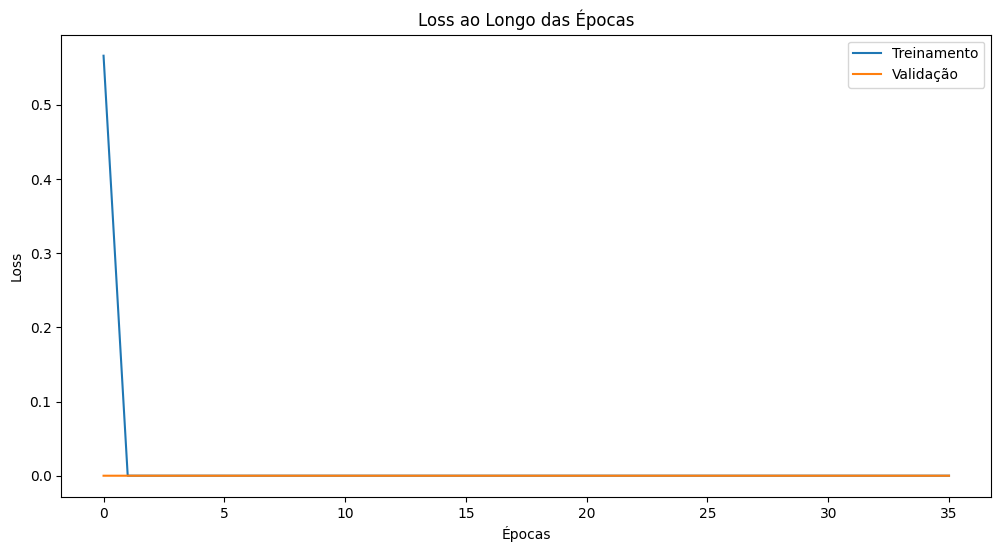

In [81]:
# Criar modelo
# Adicionar a primeira camada oculta com especificação da entrada
model_regressao.add(Dense(50, activation='relu', input_shape=(X_train_regressao.shape[1],)))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(1, activation='linear'))  # Saída linear para regressão

# Compilar modelo
model_regressao.compile(loss='mean_squared_error', optimizer='adam')

# Configurar Early Stopping ##Depois de 10 epochas o modelo não melhorar vai parar de treinar. Verbose=1 vai mostrar as epochas.
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

# Treinar modelo com o Early Stopping como callback.
history = model_regressao.fit(X_train_regressao,
                    y_train_regressao,
                    epochs=40,
                    batch_size=32,
                    validation_data=(X_val_regressao, y_val_regressao),
                    callbacks=[early_stopping])


clear_output(wait=True)


def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss ao Longo das Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

Metricas e Avaliação do Modelo

In [82]:
def metricas_regressao(X_test, y_test, scaler_y_regressao, model):
    """
    Avalia métricas de regressão para um modelo e conjunto de teste fornecidos.

    Parâmetros:
    - X_test: características do conjunto de teste.
    - y_test: rótulos verdadeiros do conjunto de teste.
    - scaler_y: scaler utilizado para normalizar a variável alvo.
    - model: modelo treinado para fazer previsões.

    Retorna:
    Métricas de avaliação de regressão impressas.
    """

    # 1. Fazer previsões usando o modelo fornecido
    predict = model.predict(X_test)

    # 2. Inverter a transformação para obter os valores originais (não normalizados)
    predict = scaler_y_regressao.inverse_transform(predict)
    real = scaler_y_regressao.inverse_transform(y_test)

    # 3. Calcular R2 e R2 ajustado
    k = X_test.shape[1]
    n = len(X_test)
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)  # fórmula para R2 ajustado


    # 4. Imprimir métricas
    print('Root Mean Square Error:', round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2), 2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict), 2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict), 2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict), 2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict) * 100, 2))
    print('R2 score:', round(sm.r2_score(real, predict) * 100, 2))
    print('Adjusted R2 =', round(adj_r2, 3) * 100)

In [83]:
metricas_regressao(X_test_regressao, y_test_regressao, scaler_y_regressao, model_regressao)

130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Root Mean Square Error: 218441.55
Mean Square Error: 25720012936614.11
Mean Absolut Error: 1212239.56
Median Absolut Error: 972580.38
Explain Variance Score: 0.0
R2 score: -0.18
Adjusted R2 = -0.7000000000000001


130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


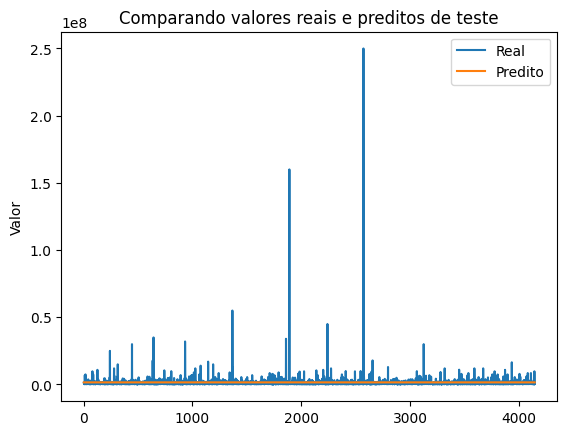

In [84]:
predict = model_regressao.predict(X_test_regressao)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_regressao_desnormalizado = scaler_y_regressao.inverse_transform(y_test_regressao)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_y_regressao.inverse_transform(predict)

#Gráfico
grafico_x = [x for x in range(1,len(y_test_regressao_desnormalizado)+1)]

plt.plot(grafico_x, y_test_regressao_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()

Análise Descritiva dos dados de imóveis para a Aluguel

In [85]:
#Base Venda
df_aluguel = df[df['operacao'] == 'aluguel']

In [86]:
df_aluguel.head()

,index,Título,Valor,area,quartos,suites,garagem,regiao,cidade,imobiliaria,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
0,0,SCS Quadra 06 Bloco A Lote 194,7000.0,200.0,0,0,0,ASA SUL,BRASÍLIA - ASA SUL,Ovídio Maia imóveis,...,0,0,0,0,0,0,0,0,0,Prédio
1,1,Rua 14,2000.0,63.0,2,1,1,SUL,ÁGUAS CLARAS - SUL,Moni Netimoveis,...,0,0,0,0,0,0,0,0,0,Apartamento
2,2,SQNW 310 Bloco B,5100.0,76.0,2,1,2,NOROESTE,BRASÍLIA - NOROESTE,Artiaga Imóveis,...,0,1,0,0,0,0,0,0,0,Apartamento
3,3,Rua COPAIBA,1800.0,32.0,0,0,1,NORTE,ÁGUAS CLARAS - NORTE,Antônio Soares Netimóveis,...,0,0,0,0,0,0,0,0,0,Sala
4,4,SHIS QL 12,95000.0,1952.0,15,0,0,LAGO SUL,BRASÍLIA - LAGO SUL,Paulo Duarte Imóveis,...,0,0,0,0,0,0,0,0,0,Casa


In [87]:
len(df_aluguel)

6941

In [88]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 6940
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    6941 non-null   int64  
 1   Título                   6941 non-null   object 
 2   Valor                    6941 non-null   float64
 3   area                     6941 non-null   float64
 4   quartos                  6941 non-null   int64  
 5   suites                   6941 non-null   int64  
 6   garagem                  6941 non-null   int64  
 7   regiao                   6941 non-null   object 
 8   cidade                   6941 non-null   object 
 9   imobiliaria              6941 non-null   object 
 10  creci                    6941 non-null   object 
 11  operacao                 6941 non-null   object 
 12  Aquecimento Solar        6941 non-null   int64  
 13  Circuito de TV           6941 non-null   int64  
 14  Gerador de Energia      

Removendo as colunas que eu considero irrelevante para o modelo

In [89]:
df_aluguel = df_aluguel.drop(columns=[ 'index', 'Título', 'cidade', 'imobiliaria', 'creci', 'operacao', 'Aquecimento Solar', 'Circuito de TV', 'Gerador de Energia', 'Cobertura Coletiva', 'Guarita', 'Interfone', 'Mobiliado', 'Despensa', 'Escritório', 'Gás Canalizado', 'Jardim', 'Lavabo', 'Lazer no Pilotis',  'Poço Artesiano', 'Portão Eletrônico', 'Quadra Esportiva', 'Sala de Jogos', 'Salão de Jogos', 'Salão Gourmet', 'Sauna', 'SPA', 'Área de Serviço Coberta', 'Piso em Porcelanato', 'Vista Livre', 'Home Theater', 'Aceita Pet' ])


In [90]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 6940
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  6941 non-null   float64
 1   area                   6941 non-null   float64
 2   quartos                6941 non-null   int64  
 3   suites                 6941 non-null   int64  
 4   garagem                6941 non-null   int64  
 5   regiao                 6941 non-null   object 
 6   Piscina                6941 non-null   int64  
 7   Sala de Ginástica      6941 non-null   int64  
 8   Varanda                6941 non-null   int64  
 9   Cozinha Espaçosa       6941 non-null   int64  
 10  Ar Condicionado        6941 non-null   int64  
 11  PlayGround             6941 non-null   int64  
 12  Salão de Festas        6941 non-null   int64  
 13  Projeto de Iluminação  6941 non-null   int64  
 14  Pintura Nova           6941 non-null   int64  
 15  Área

In [ ]:
df_aluguel['tipo'].value_counts()

In [91]:
# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [ ]:
df_aluguel['regiao'].value_counts()

Transformando as string em numérico

In [92]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar o encoder aos valores da coluna região
df_aluguel['regiao_encoded'] = label_encoder.fit_transform(df_aluguel['regiao'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for regiao, encoded_value in mapeamento.items():
    print(f"{regiao}: {encoded_value}")

Mapeamento:
ADE: 0
ALPHAVILLE BRASILIA: 1
ALTIPLANO LESTE: 2
ALTO DA BOA VISTA: 3
ARAPOANGA: 4
AREAL: 5
ARNIQUEIRA: 6
ASA NORTE: 7
ASA SUL: 8
CANDANGOLANDIA: 9
CEILANDIA CENTRO: 10
CEILANDIA NORTE: 11
CEILANDIA SUL: 12
CENTRO: 13
CHACARAS YPIRANGA: 14
COLONIA AGRICOLA SAMAMBAIA: 15
CONDOMINIO MANSOES SOBRADINHO: 16
CONDOMINIO PRIVE LUCENA RORIZ: 17
CONDOMINIO RK: 18
CONDOMÍNIO IMPÉRIO DOS NOBRES: 19
ESTANCIA MESTRE DARMAS I: 20
ESTANCIA MESTRE DARMAS III: 21
ESTANCIA MESTRE DARMAS V: 22
FAZENDINHA: 23
GRANDE COLORADO: 24
GRANJA DO TORTO: 25
GUARA I: 26
GUARA II: 27
IPIRANGA: 28
ITAPOA PARQUE: 29
ITAPUA: 30
JARDIM BOTANICO: 31
JARDIM BRASILIA: 32
JARDIM CEU AZUL: 33
JARDIM DAS OLIVEIRAS I: 34
JARDIM PAQUETA II: 35
JARDIM RORIZ: 36
JARDINS MANGUEIRAL: 37
LAGO NORTE: 38
LAGO SUL: 39
LUZILIA PARQUE: 40
MANSOES ABRAAO I: 41
METROPOLITANA: 42
MORADA NOBRE: 43
NOROESTE: 44
NORTE: 45
NOVO: 46
NOVO JARDIM ORIENTE: 47
NUCLEO BANDEIRANTE: 48
NUCLEO RURAL LAGO OESTE: 49
OCTOGONAL: 50
PARANOA: 51
P

In [93]:
# Ajustar o encoder aos valores da coluna região
df_aluguel['tipo_encoded'] = label_encoder.fit_transform(df_aluguel['tipo'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for tipo, encoded_value in mapeamento.items():
    print(f"{tipo}: {encoded_value}")

Mapeamento:
Apartamento: 0
Casa: 1
Galpão: 2
Garagem: 3
Hotel: 4
Kitnet: 5
Loja: 6
Lote/Terreno/Área: 7
Loteamento: 8
Ponto: 9
Prédio: 10
Rural: 11
Sala: 12


Separar o X e o y, Normalizando os dados, e separar os dados em treinamento, teste e validação

In [94]:
df_aluguel = df_aluguel.drop(columns=['regiao', 'tipo'])

In [95]:
# Separar X e y
X_regressao = df_aluguel.drop('Valor', axis = 1)
y_regressao = df_aluguel[['Valor']]

# Separar X e y em treinamento (80%), validação (10%) e teste (10%)
X_train_regressao, X_temp, y_train_regressao, y_temp = train_test_split(X_regressao, y_regressao, test_size=0.2, random_state=42)
X_val_regressao, X_test_regressao, y_val_regressao, y_test_regressao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar X e y
scaler_X_regressao = MinMaxScaler()
X_regressao = scaler_X_regressao.fit_transform(X_regressao)

X_train_regressao = scaler_X_regressao.transform(X_train_regressao)
X_val_regressao = scaler_X_regressao.transform(X_val_regressao)
X_test_regressao = scaler_X_regressao.transform(X_test_regressao)

scaler_y_regressao = MinMaxScaler()
y_regressao = scaler_y_regressao.fit_transform(y_regressao)

y_train_regressao = scaler_y_regressao.transform(y_train_regressao)
y_val_regressao = scaler_y_regressao.transform(y_val_regressao)
y_test_regressao = scaler_y_regressao.transform(y_test_regressao)


# Exibe as 5 primeiro linhas do df_aluguel
df_aluguel.head()

,Valor,area,quartos,suites,garagem,Piscina,Sala de Ginástica,Varanda,Cozinha Espaçosa,Ar Condicionado,...,Projeto de Iluminação,Pintura Nova,Área de Lazer,Área de Serviço,Brinquedoteca,Churrasqueira,Cozinha com Armários,Academia,regiao_encoded,tipo_encoded
0,7000.0,200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,10
1,2000.0,63.0,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,119,0
2,5100.0,76.0,2,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,44,0
3,1800.0,32.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,45,12
4,95000.0,1952.0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39,1


Criar modelo e Treinar o modelo

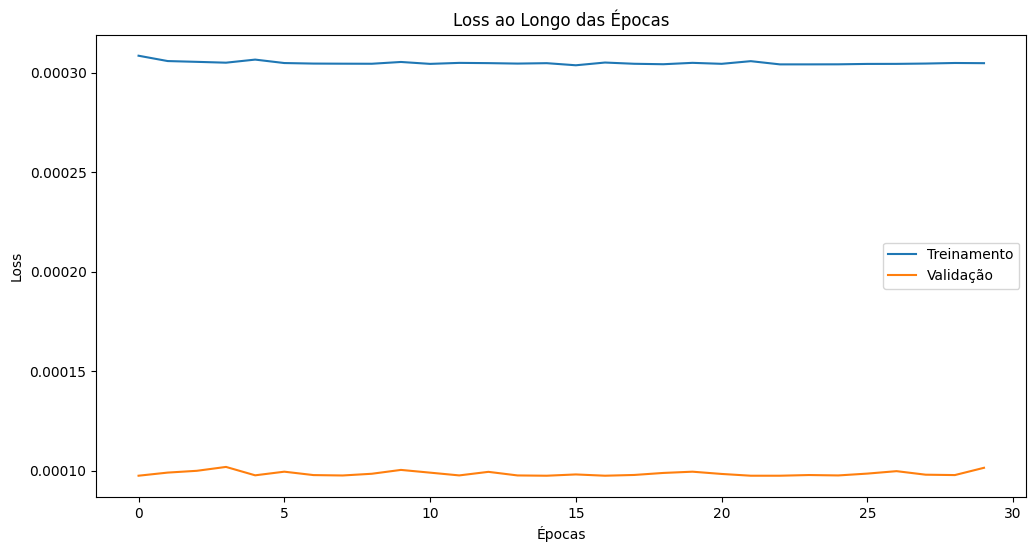

In [96]:
# Criar modelo
# Adicionar a primeira camada oculta com especificação da entrada
model_regressao.add(Dense(50, activation='relu', input_shape=(X_train_regressao.shape[1],)))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(50, activation='relu'))

model_regressao.add(Dense(1, activation='linear'))  # Saída linear para regressão

# Compilar modelo
model_regressao.compile(loss='mean_squared_error', optimizer='adam')

# Configurar Early Stopping ##Depois de 10 epochas o modelo não melhorar vai parar de treinar. Verbose=1 vai mostrar as epochas.
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

# Treinar modelo com o Early Stopping como callback.
history = model_regressao.fit(X_train_regressao,
                    y_train_regressao,
                    epochs=40,
                    batch_size=32,
                    validation_data=(X_val_regressao, y_val_regressao),
                    callbacks=[early_stopping])


clear_output(wait=True)


def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss ao Longo das Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

Metricas e Avaliação do Modelo

In [98]:
def metricas_regressao(X_test, y_test, scaler_y_regressao, model):
    """
    Avalia métricas de regressão para um modelo e conjunto de teste fornecidos.

    Parâmetros:
    - X_test: características do conjunto de teste.
    - y_test: rótulos verdadeiros do conjunto de teste.
    - scaler_y: scaler utilizado para normalizar a variável alvo.
    - model: modelo treinado para fazer previsões.

    Retorna:
    Métricas de avaliação de regressão impressas.
    """

    # 1. Fazer previsões usando o modelo fornecido
    predict = model.predict(X_test)

    # 2. Inverter a transformação para obter os valores originais (não normalizados)
    predict = scaler_y_regressao.inverse_transform(predict)
    real = scaler_y_regressao.inverse_transform(y_test)

    # 3. Calcular R2 e R2 ajustado
    k = X_test.shape[1]
    n = len(X_test)
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)  # fórmula para R2 ajustado


    # 4. Imprimir métricas
    print('Root Mean Square Error:', round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2), 2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict), 2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict), 2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict), 2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict) * 100, 2))
    print('R2 score:', round(sm.r2_score(real, predict) * 100, 2))
    print('Adjusted R2 =', round(adj_r2, 3) * 100)

In [99]:
metricas_regressao(X_test_regressao, y_test_regressao, scaler_y_regressao, model_regressao)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Root Mean Square Error: 544.16
Mean Square Error: 2701942695.83
Mean Absolut Error: 17213.49
Median Absolut Error: 11253.02
Explain Variance Score: 0.0
R2 score: -0.01
Adjusted R2 = -3.1


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


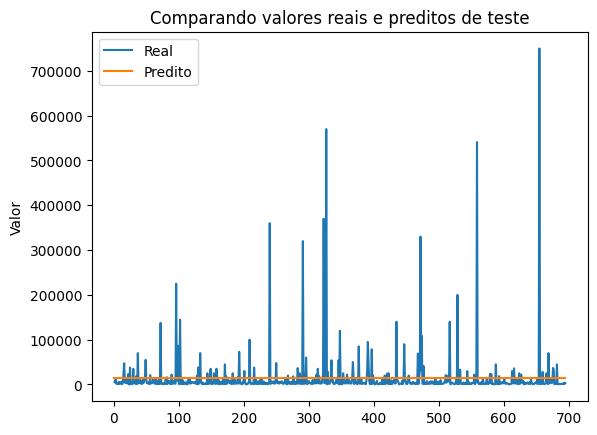

In [100]:
predict = model_regressao.predict(X_test_regressao)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_regressao_desnormalizado = scaler_y_regressao.inverse_transform(y_test_regressao)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_y_regressao.inverse_transform(predict)

#Gráfico
grafico_x = [x for x in range(1,len(y_test_regressao_desnormalizado)+1)]

plt.plot(grafico_x, y_test_regressao_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()